In [1]:
# -*- coding: utf-8 -*-
#-*- coding: cp950 -*-

#import sys
import os as os
import sys

import matplotlib.pyplot as plt
#%matplotlib inline
plt.rcParams['font.sans-serif']=['SimSun'] 
plt.rcParams['axes.unicode_minus']=False
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 11, 8
#plt.style.use('classic')
import pylab as plb 
%matplotlib inline
import seaborn as sns
sns.set()  #***************************

from scipy.optimize import curve_fit
import scipy as sy
import pylab as plb  

import pandas as pd
import numpy as np
#import seaborn as sns
from sklearn.linear_model import LinearRegression
#import sys
#import os as os

from pandas import *

import cv2 as cv
import matplotlib.image as mpimg
from PIL import Image
from scipy import misc
import imageio
from sklearn import model_selection #***************************
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import ShuffleSpli
from sklearn import ensemble, preprocessing, metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1

from sklearn import tree


import xgboost #*************
import xgboost as xgb   #*************
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

from sklearn import datasets

from sklearn import preprocessing, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVC
from sklearn import svm, preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.pipeline import Pipeline

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.datasets import make_classification
from sklearn.datasets import make_gaussian_quantiles


In [2]:
df= pd.read_csv('./data/iris_py.csv',encoding='cp950')  #index_col=0
print('--------------------------------\n')
print('#The first 5 rows of data \n')
df.head()  

--------------------------------

#The first 5 rows of data 



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
df2=df.dropna()  # df.dropna(axis="rows")
df2.isnull().sum()  

NameError: name 'df' is not defined

In [8]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [9]:
len(df2.columns)

5

In [3]:
y= df2.iloc[:,-1]
a=len(df2.columns)-1 
x=df2.iloc[:,:a]

NameError: name 'df2' is not defined

In [5]:
print('--------------------------------\n')
print('#The Frequency of Target Values \n')
print(y.value_counts())
print('--------------------------------\n')

--------------------------------

#The Frequency of Target Values 

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64
--------------------------------



In [21]:
from sklearn import model_selection


In [2]:
seed = 7
models = []
#models.append(('LR', LogisticRegression()))  #多分類,不用LogisticR
#models.append(('LogisticR', linear_model.LogisticRegression()))  #solver{'newton-cg’, 'lbfgs’,'liblinear’,‘sag’,‘saga’}, default=’lbfgs’
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', ensemble.RandomForestClassifier()))
models.append(('Bagging', ensemble.BaggingClassifier()))
models.append(('AdaBoost', ensemble.AdaBoostClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GBDT', GradientBoostingClassifier()))
models.append(('XBDT', XGBClassifier()))

print('--------------------------------\n')
print('#The Classification Accuracy for Different Algorithms \n')

results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = " model: %s , accuracy: %5.3f , std: %5.3f " % (name, cv_results.mean(), cv_results.std())
	print(msg)  
 
print('--------------------------------\n')

--------------------------------

#The Classification Accuracy for Different Algorithms 



NameError: name 'x' is not defined

In [7]:
#pd.DataFrame(msg)
results=pd.DataFrame(results)
Name=pd.DataFrame(names)
resM=pd.DataFrame(results.mean(1))
resM=pd.concat([Name,resM], axis=1)
resM.columns=[['Model','accuracy']]
resM['Rank'] = resM['accuracy'].rank(ascending=False).astype(int)
resM

,Model,accuracy,Rank
0,LDA,0.966667,1
1,KNN,0.933333,9
2,CART,0.946667,5
3,NB,0.946667,5
4,SVM,0.953333,2
5,RF,0.926667,11
6,Bagging,0.946667,5
7,AdaBoost,0.940000,8
8,DT,0.946667,5
9,GBDT,0.946667,5


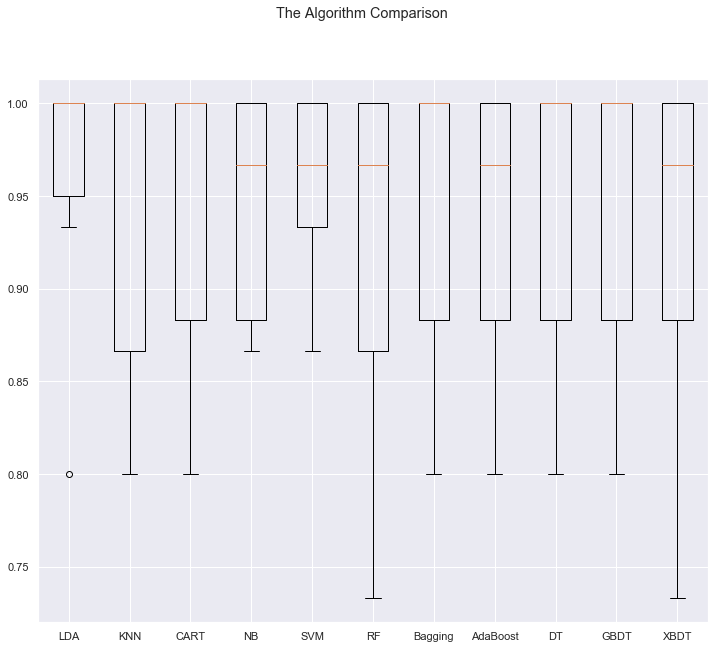

In [8]:
from matplotlib.pylab import rcParams
sns.set(font_scale=1) #****************
rcParams['figure.figsize'] = 12, 10

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('The Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [9]:
#以RF為例
model=ensemble.RandomForestClassifier()
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
cv_results.mean()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

0.9333333333333333

In [10]:
model.fit(x,y)  
importance=model.feature_importances_
Feature=pd.DataFrame(x.columns, columns=['Feature'])
Importance =pd.DataFrame(np.round(importance,3), columns=['Importance'])  
dtt= Feature.join(Importance)
dtt2= dtt
dtt2['Rank'] = dtt2['Importance'].rank(ascending=False)
dtt2['Rank'] = dtt2['Rank'].astype('int')
dtt2

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Feature,Importance,Rank
0,sepal_length,0.094,3
1,sepal_width,0.017,4
2,petal_length,0.286,2
3,petal_width,0.603,1


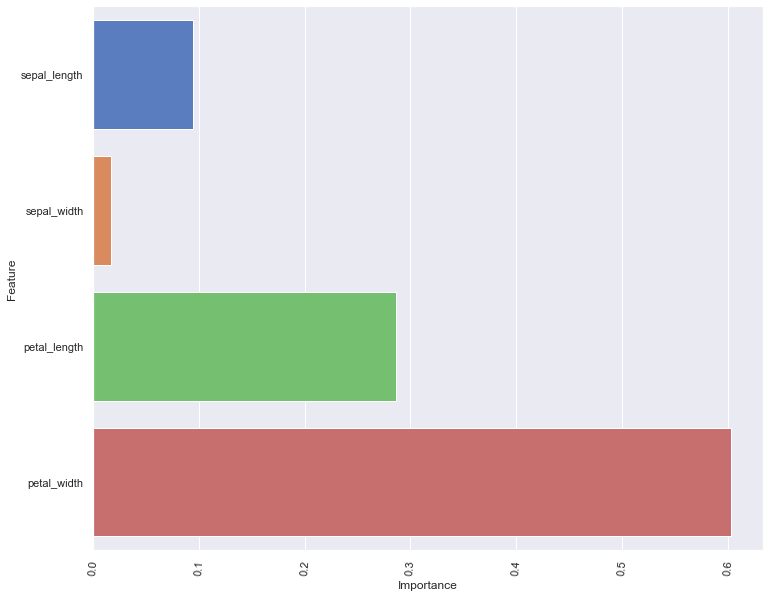

In [11]:
#繪圖
sns.set_style("darkgrid")
x=dtt["Feature"]
y=dtt["Importance"]

bar_plot = sns.barplot(x=y,y=x,palette="muted",order=x.tolist())  #使用排序
plt.xticks(rotation=85)
plt.show()